In [2]:
import matplotlib.pyplot as plt

def numify(s):
    try:
        return float(s)
    except ValueError:
        return s

In [3]:
data = {}
with open('./HAs.csv') as ha_file:
    header = ha_file.readline().rstrip()
    categories = header.split('\t')
    ind2cat = {ii:cat.replace('"','') for ii, cat in enumerate(categories)}
    for line in ha_file:
        line = [tok.replace('"','') for tok in line.rstrip().split('\t')]
    
        
        data[line[0]] = {ind2cat[ii]:numify(tok) for ii, tok in enumerate(line)}


{'name': 'SMB', 'Publisher': 'Nintendo', 'Developer': 'Nintendo', 'ReleaseDate-US': '10/31/85', 'Date Number': '10/31/85', 'Month': 10.0, 'Day ': 31.0, 'Year': 1985.0, 'minHoldDuration': 1.0, 'maxHoldDuration': 32.0, 'down_reset': 1.5375, 'down_mult': 0.0, 'down_gravity': 0.1875, 'up-control_reset': -4.1, 'up-control_gravity': 0.1333333333, 'up-fixed_reset': -0.099832279, 'up-fixed_mult': 0.8499673876, 'up-fixed_gravity': 0.3998695503, 'ground_reset': 0.0, 'ground_mult': 0.0, 'ground_gravity': 0.0}
-3.9666666667000055 Before
-3.4713695831750035
Descent -3.4713695831750035
-3.4713695831750035


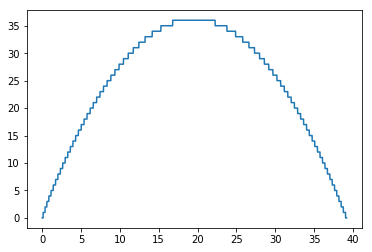

-3.1400000002400414 Before
-2.7687298762680275
Descent -2.7687298762680275
-2.7687298762680275


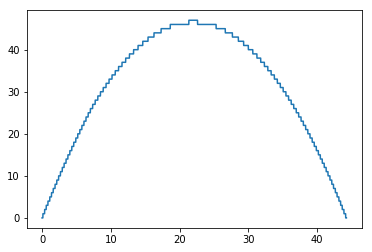

-2.3133333337800774 Before
-2.0660901693610514
Descent -2.0660901693610514
-2.0660901693610514


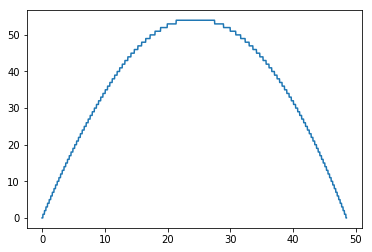

-1.4866666673201134 Before
-1.363450462454075
Descent -1.363450462454075
-1.363450462454075


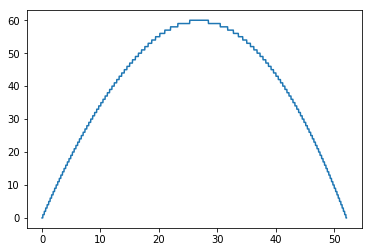

-0.6600000008601324 Before
-0.6608107555470846
Descent -0.6608107555470846
-0.6608107555470846


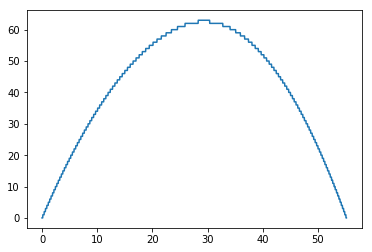

0.1666666655998692 Before
0.04182895135992362


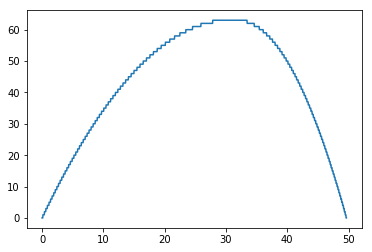

In [4]:
import numpy as np

model = data['SMB']
print(model)
dt = 1.0/60.0
tilesize = 1
for duration in np.arange(model['minHoldDuration'],model['maxHoldDuration'],(model['maxHoldDuration']-model['minHoldDuration'])/5.0-0.00000000001):
    ys = []
    y = 0
    vy = model['up-control_reset']
    ts = []
    t = 0
    for _ in np.arange(0,duration,dt):
        ys.append(y)
        ts.append(t)
        t += dt
        y -= vy*dt
        vy += model['up-control_gravity']*dt
    
    descent = False
    print(vy,'Before')
    vy = model['up-fixed_reset']+vy*model['up-fixed_mult']
    print(vy)
    while y > 0:
        ys.append(y)
        ts.append(t)
        if vy <= 0.0 and not descent:
            descent = True
            print('Descent',vy)
            #vy = model['down_reset']+vy*model['down_mult']
            print(vy)
        t += dt
        y -= vy*dt
        
        if descent or model['up-fixed_gravity'] == 0.0:
            vy += model['down_gravity']*dt
        else:
            vy += model['up-fixed_gravity']*dt
            
        
    plt.plot(ts,np.round(np.array(ys)/tilesize))
    plt.show()
